In [1]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.svm import LinearSVC, SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier, VotingClassifier

import optuna
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from scipy.stats import reciprocal, uniform
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:\\Users\\KIIT\\Downloads\\AIDS DATASET\\AIDS_Classification.csv")

<IPython.core.display.Javascript object>

In [3]:
data=df.drop('infected',axis=1)

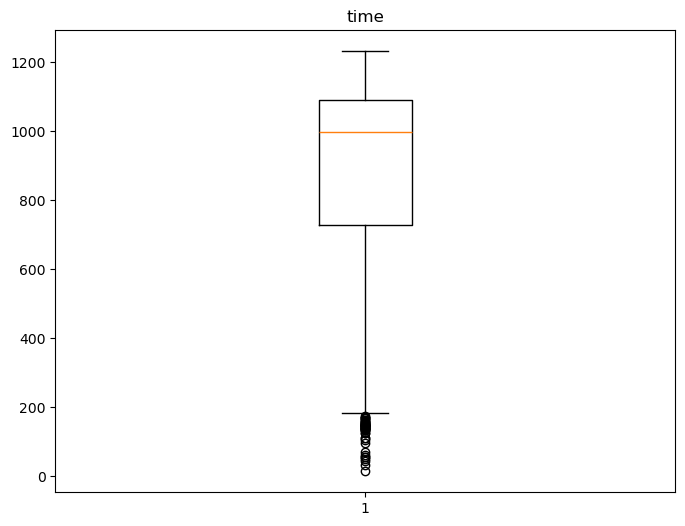

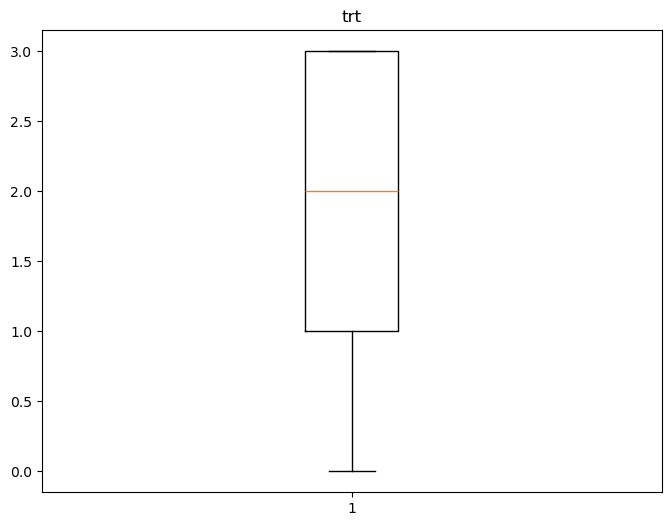

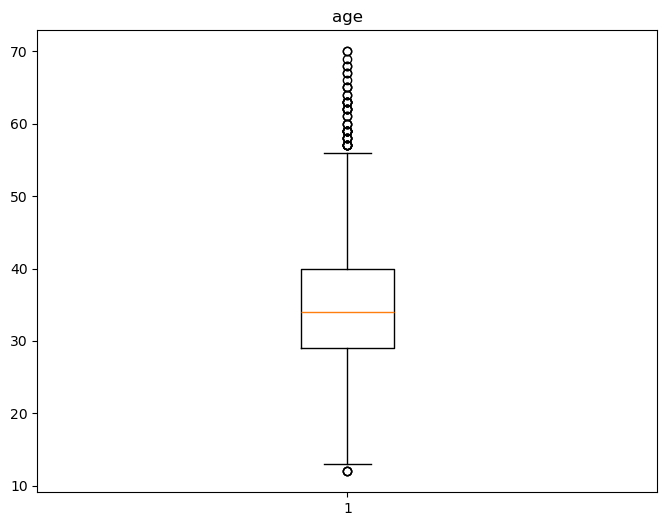

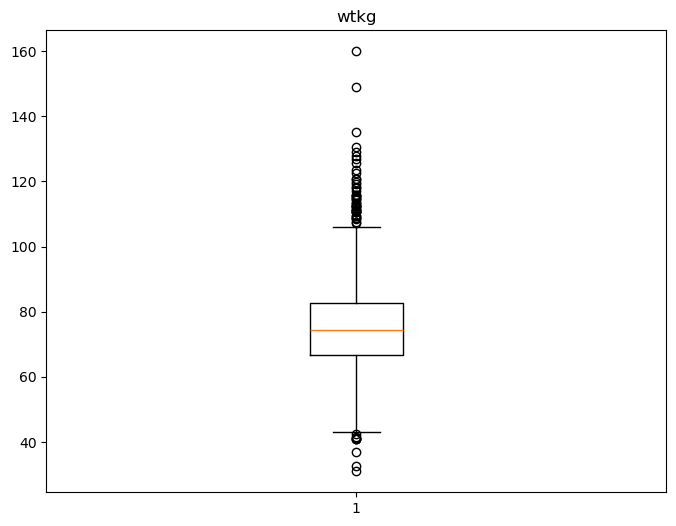

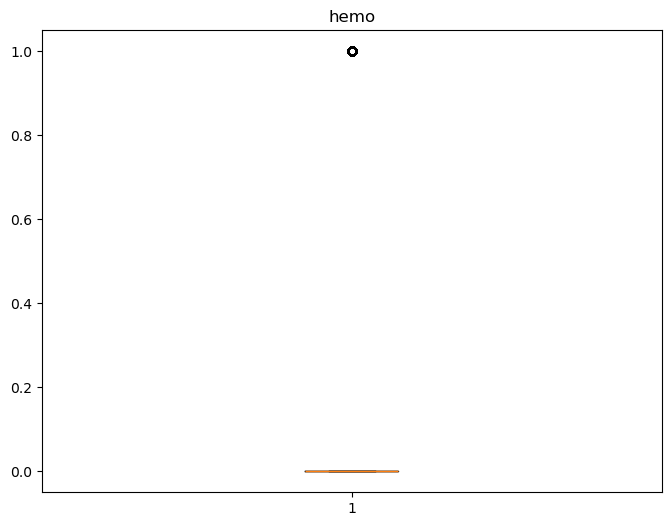

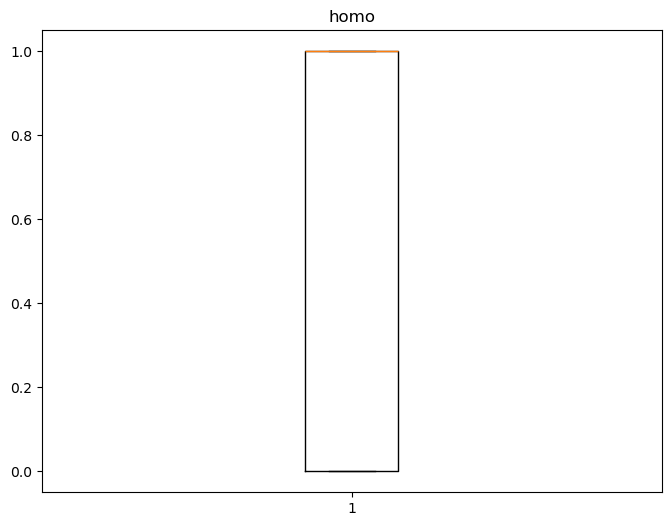

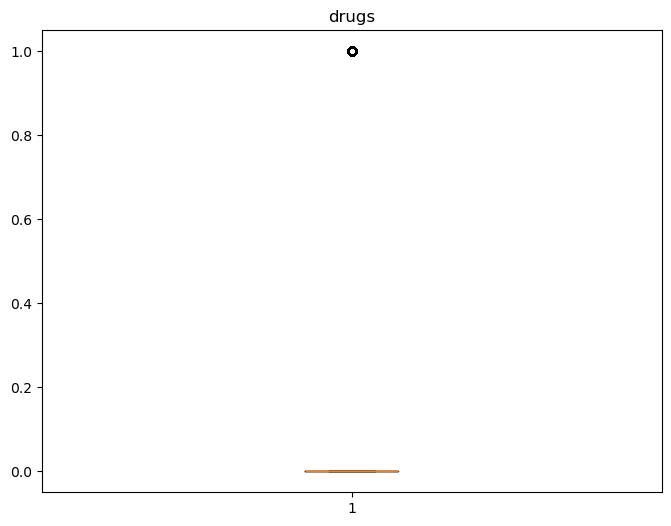

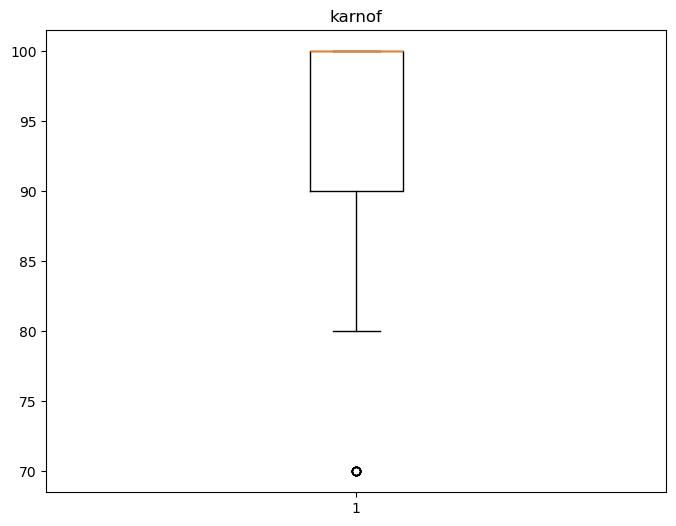

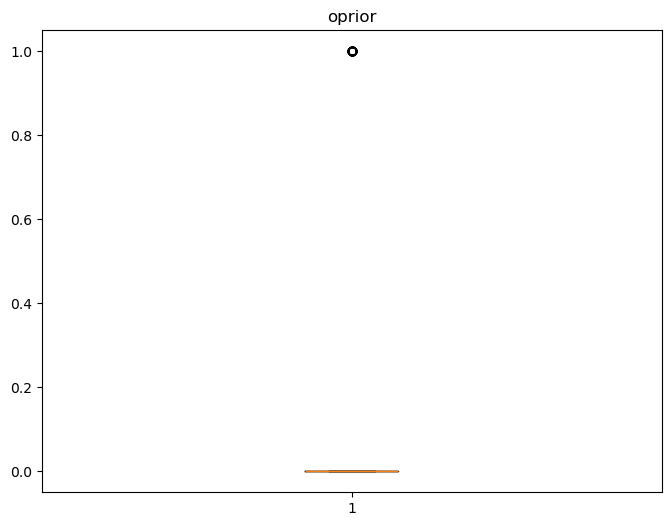

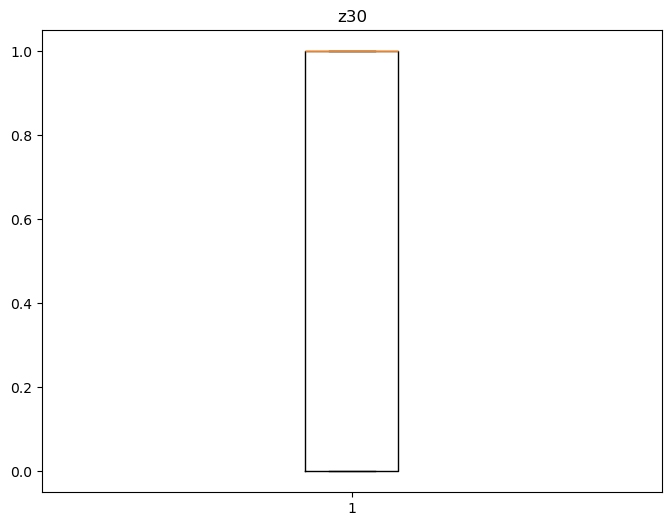

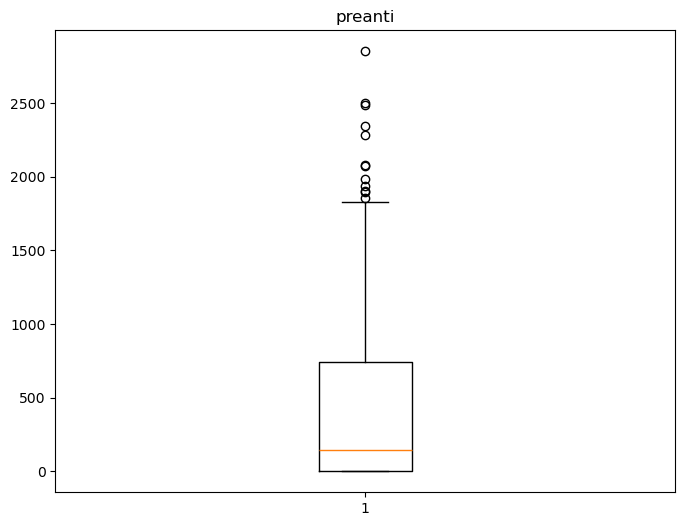

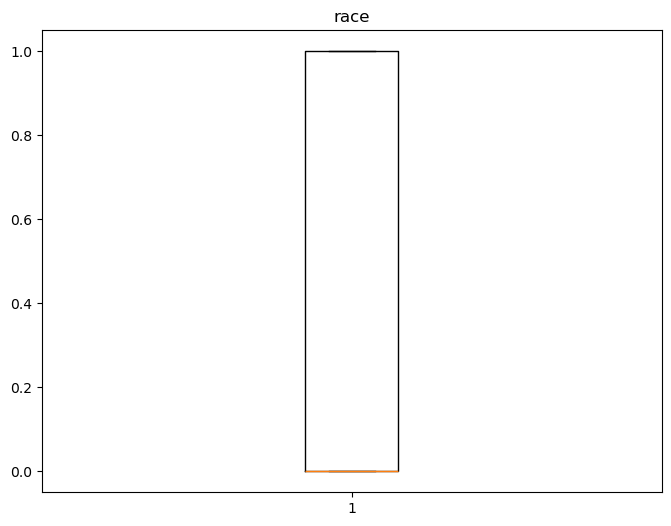

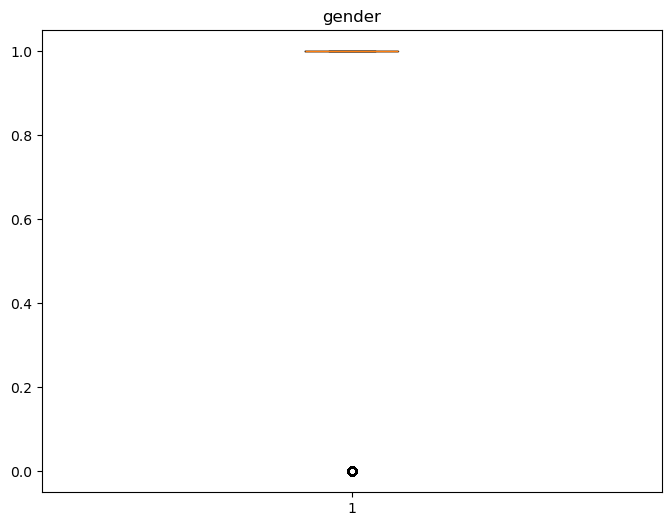

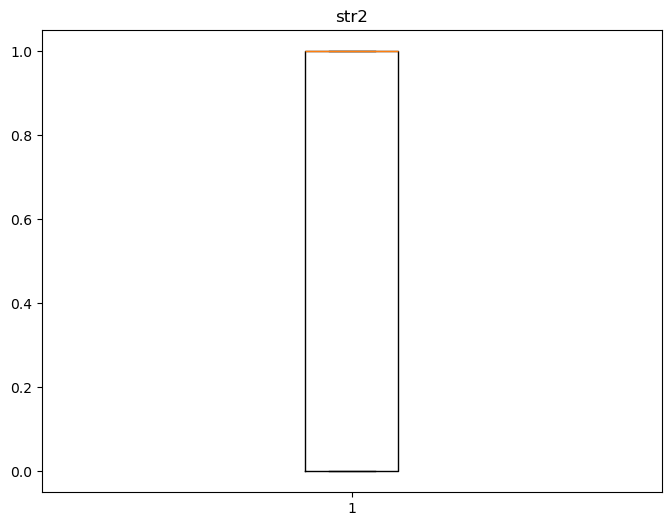

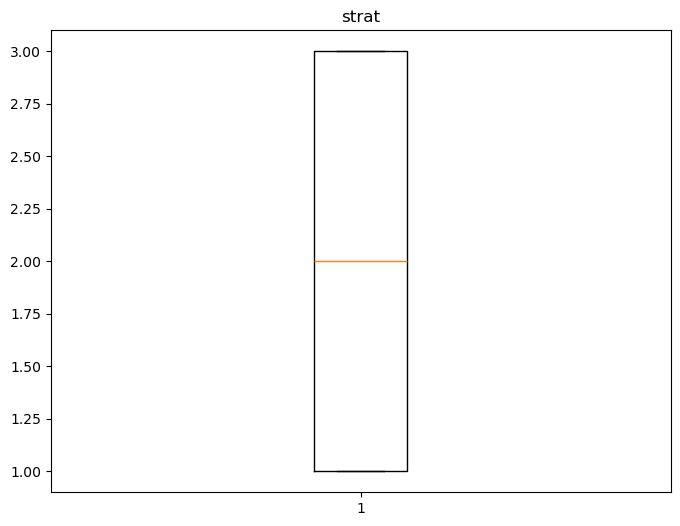

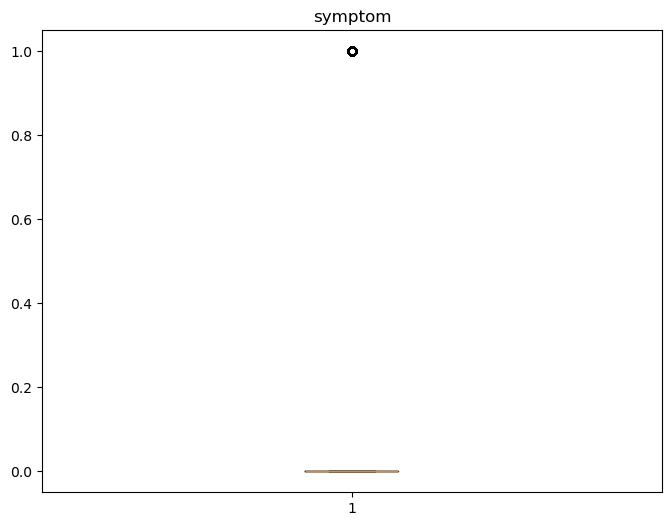

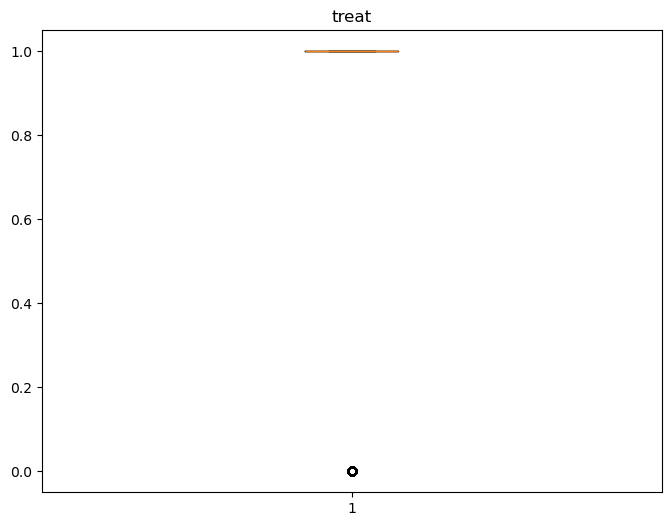

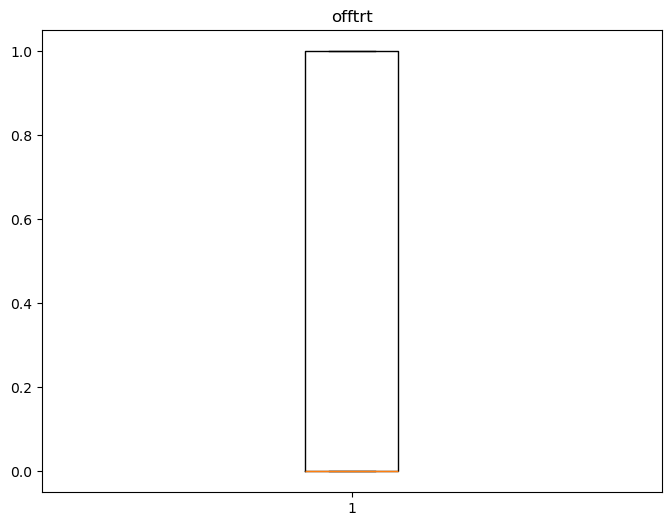

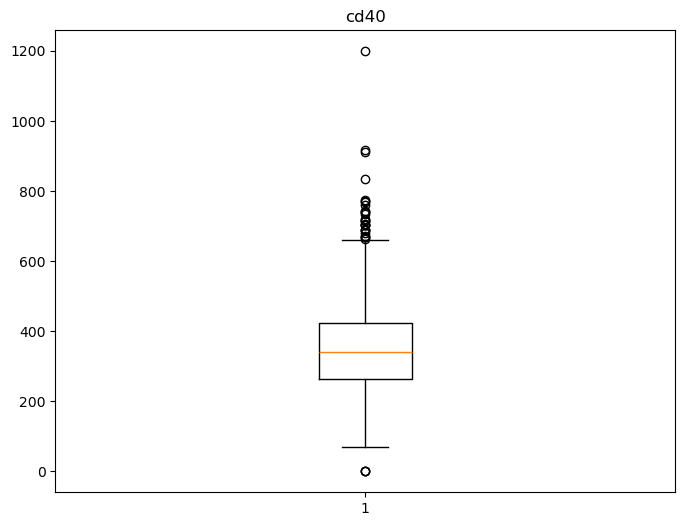

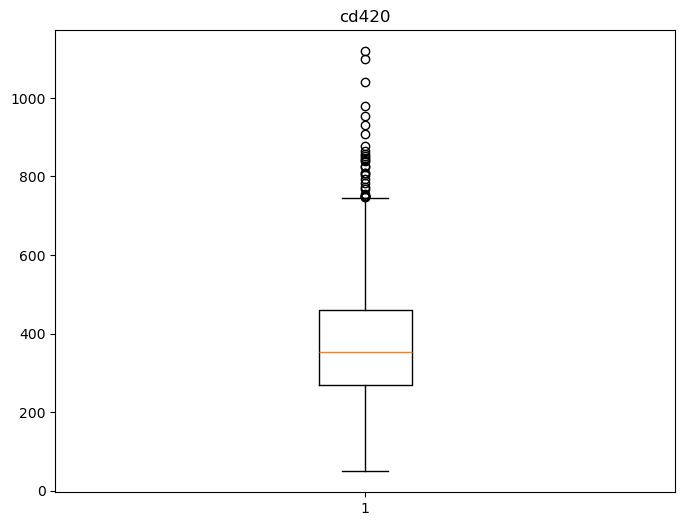

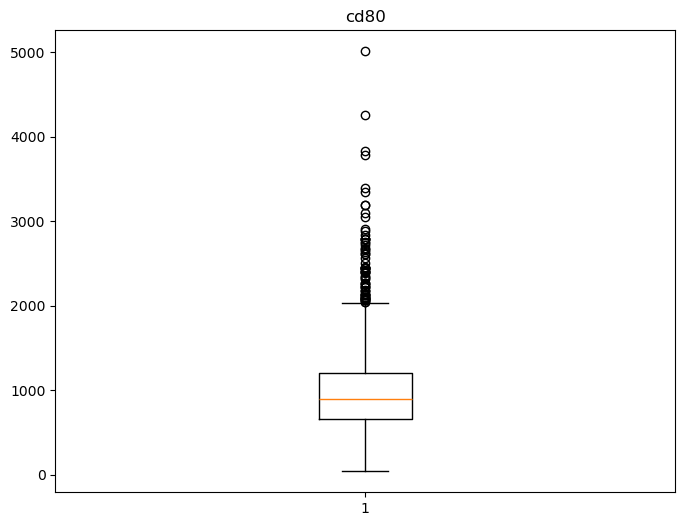

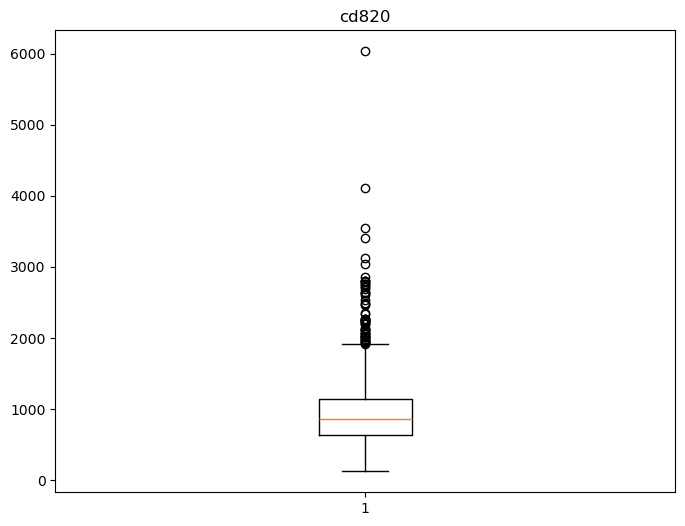

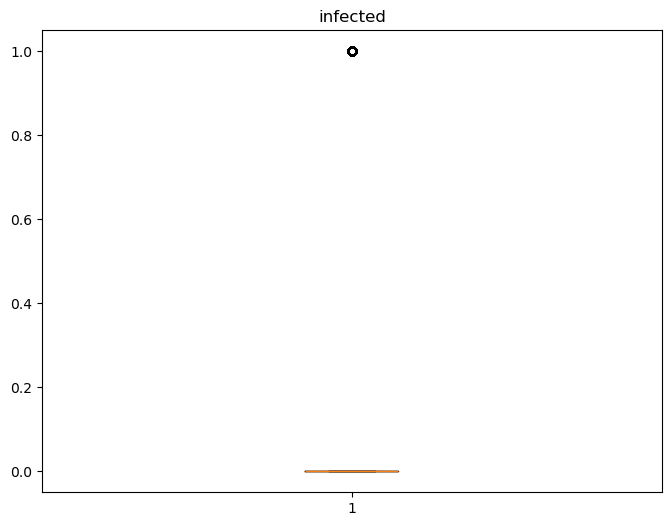

In [3]:
for col in df.columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[col])
    plt.title(f'{col}')
    plt.show()

In [4]:
def remove_outliers(df):
    for col in df.select_dtypes(include='number').columns:
        if col=='infected':
            continue
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers=(df[col] < lower_bound ) | (df[col] > upper_bound)
        df=df[~outliers]
    return df


In [5]:
df = remove_outliers(df)

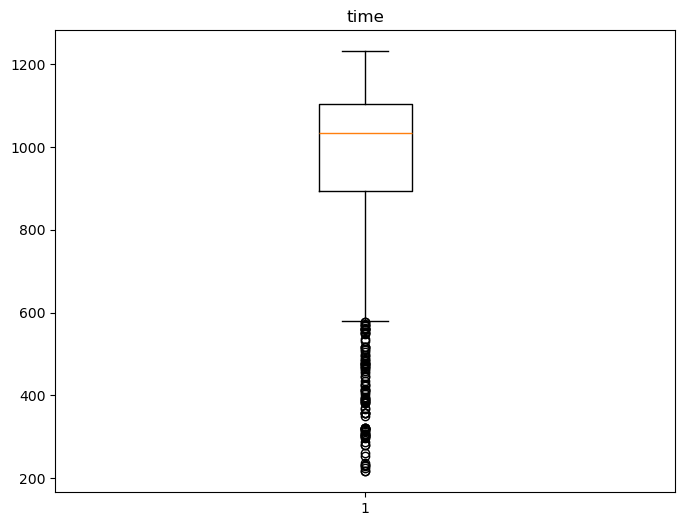

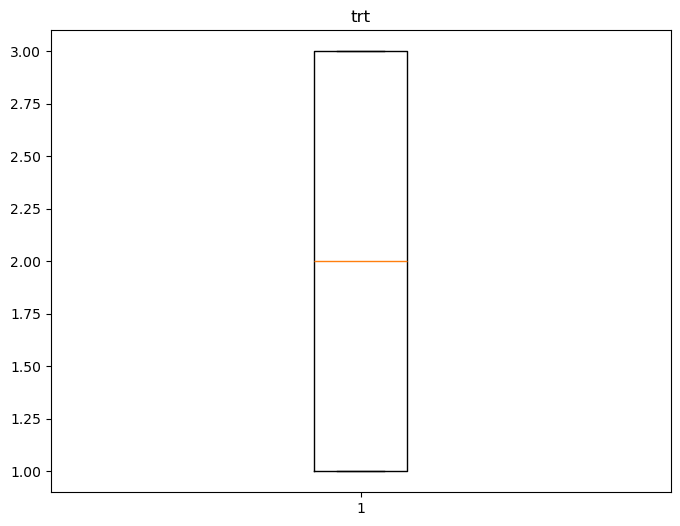

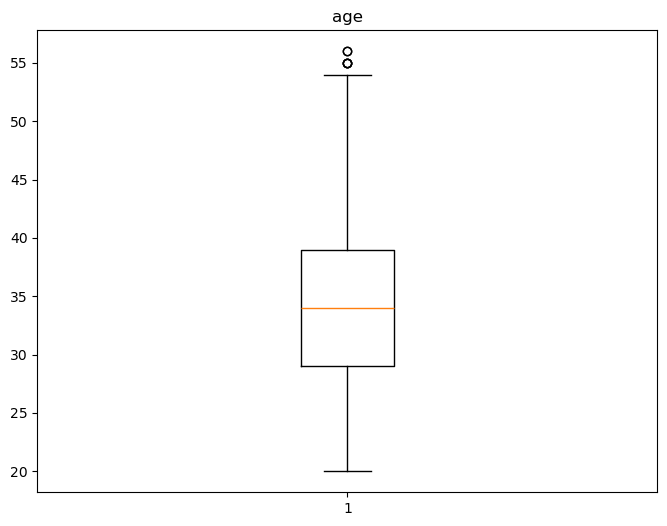

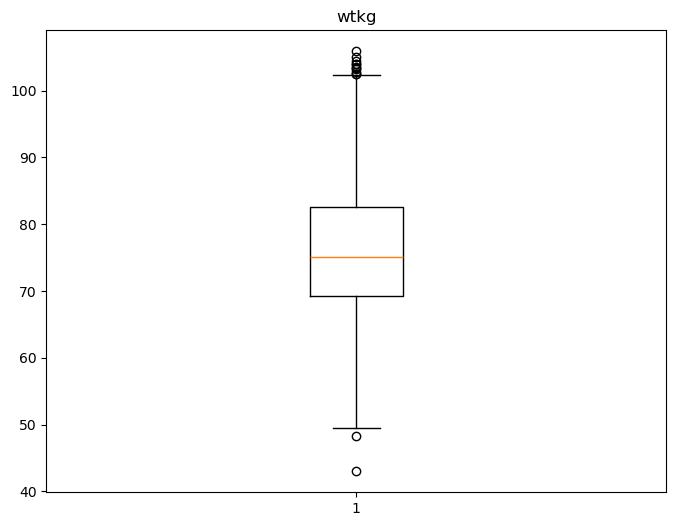

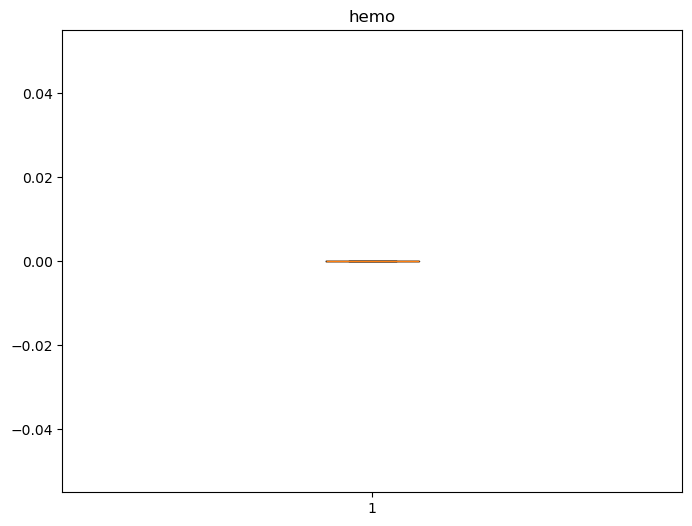

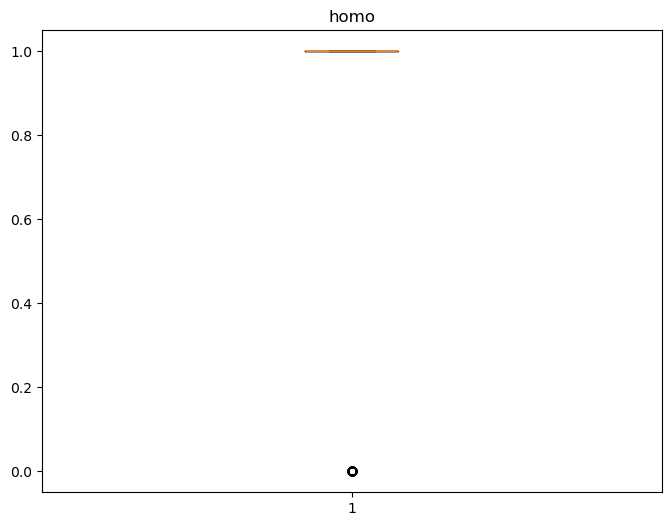

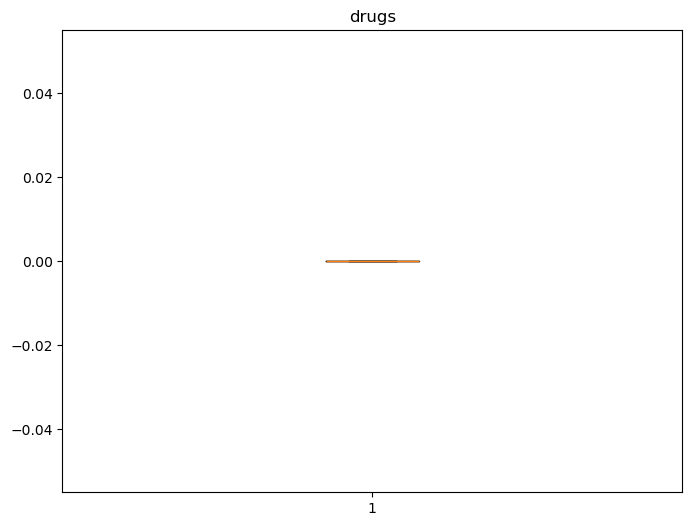

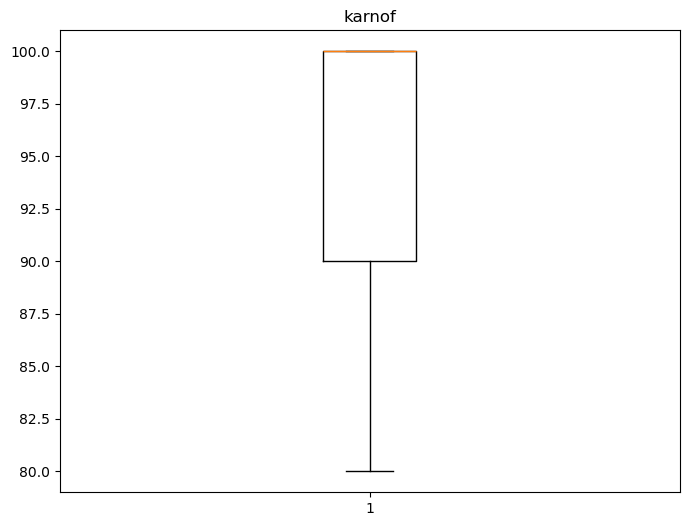

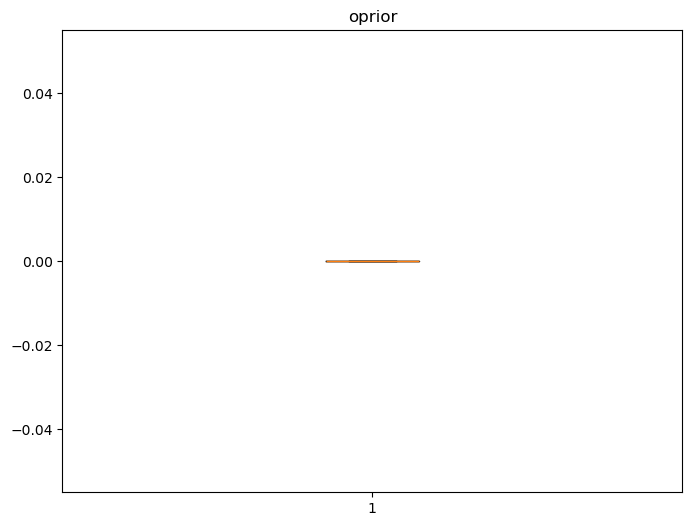

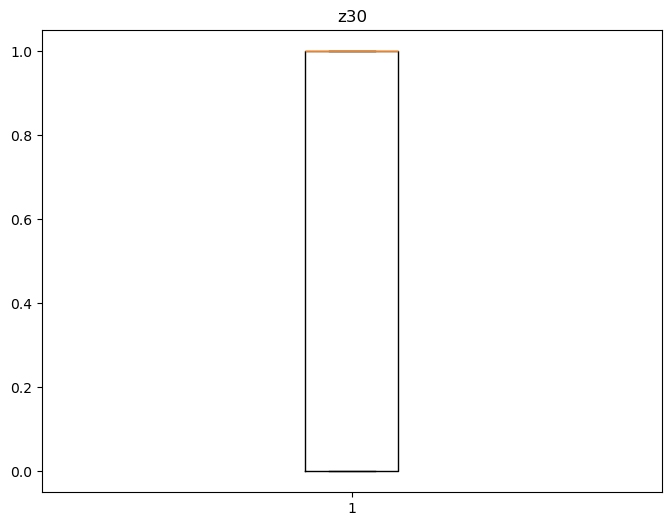

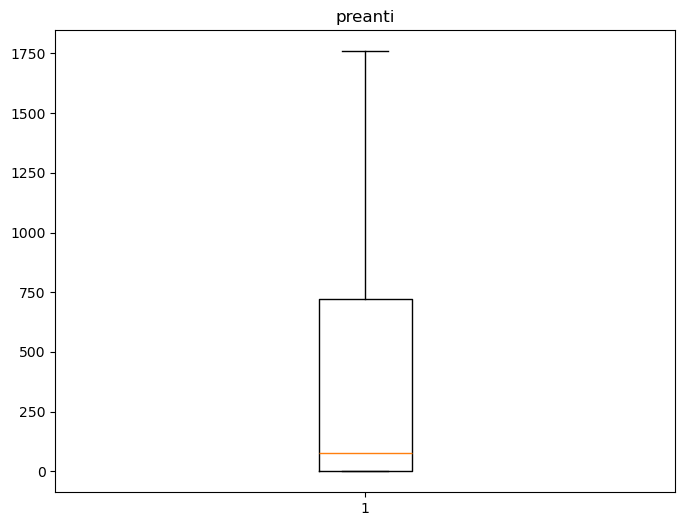

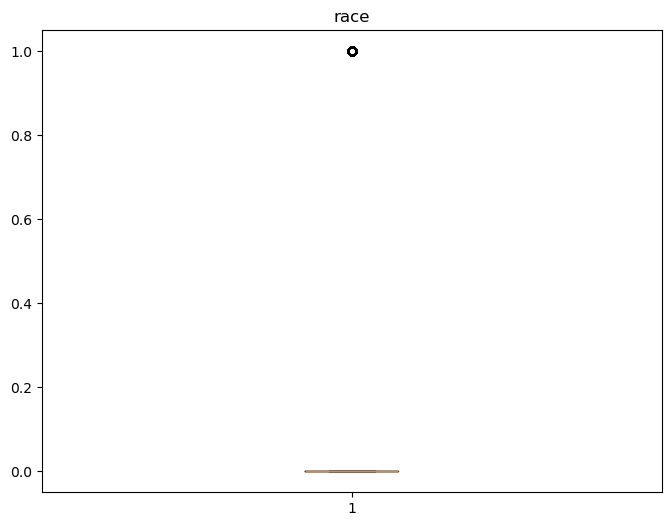

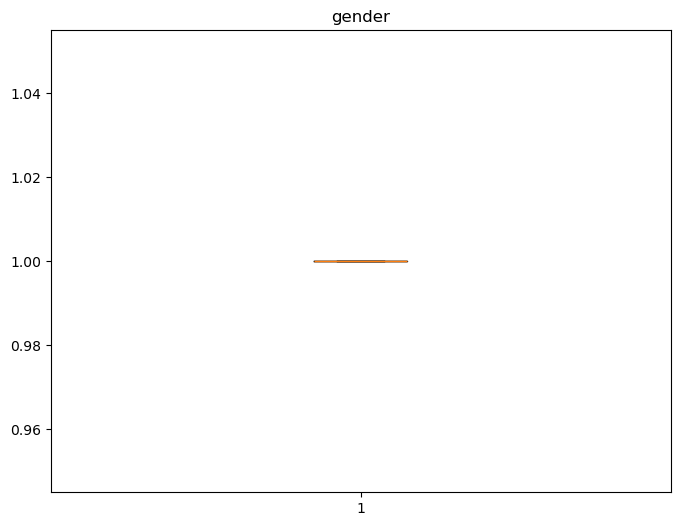

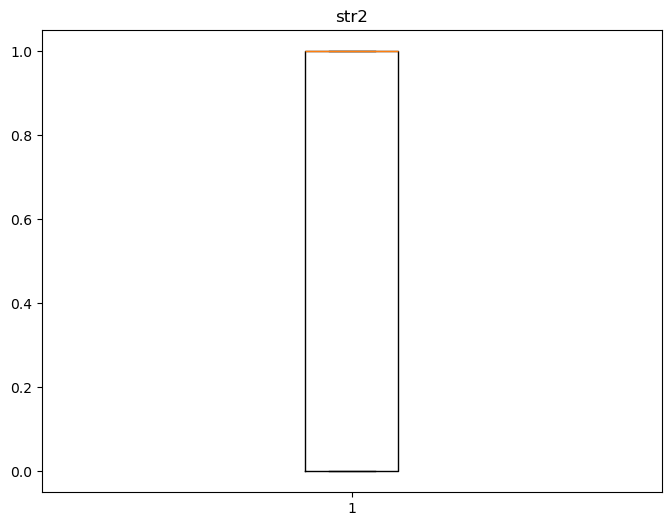

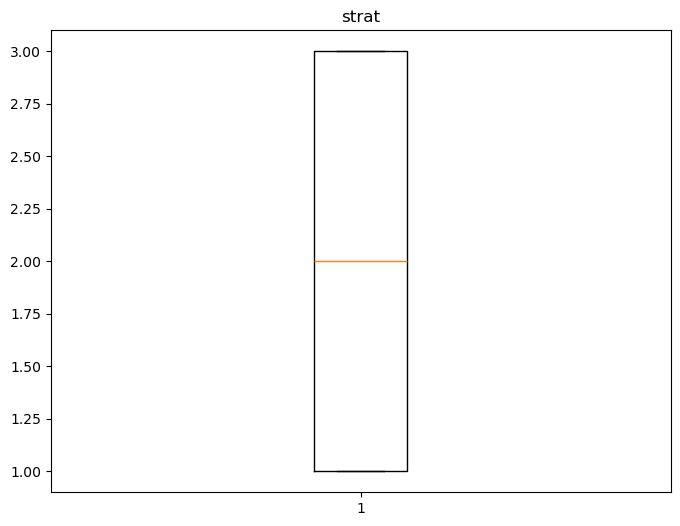

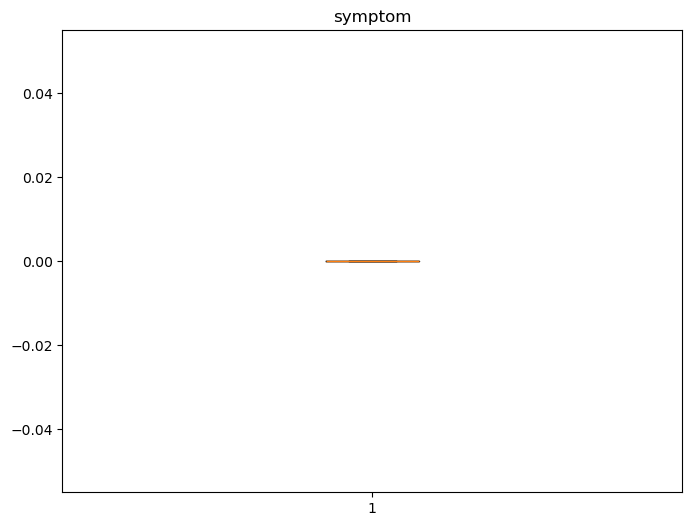

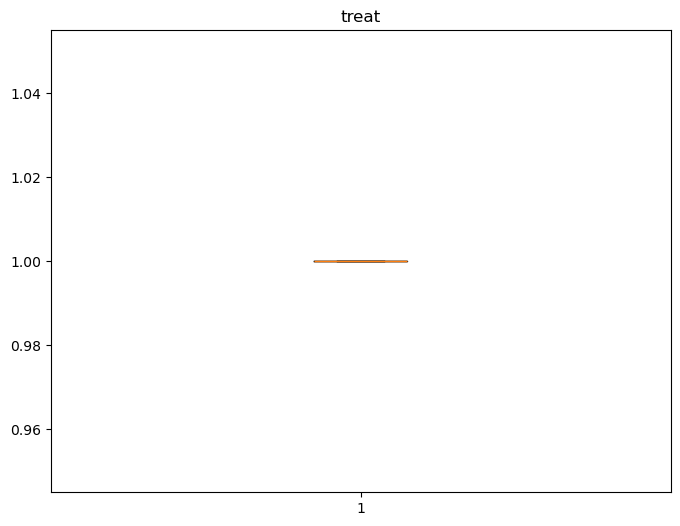

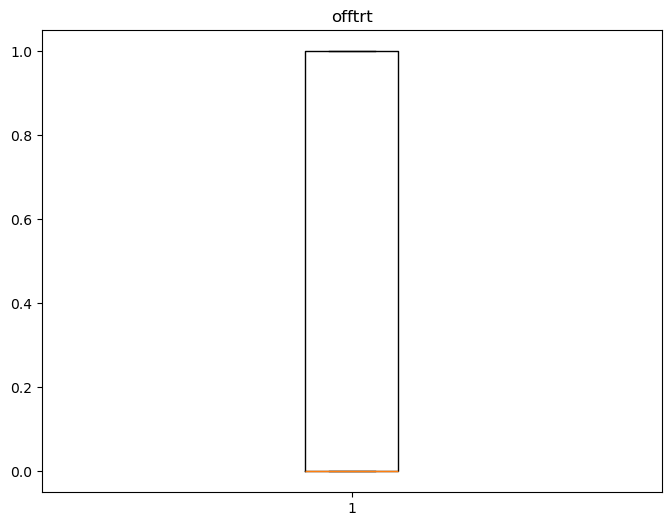

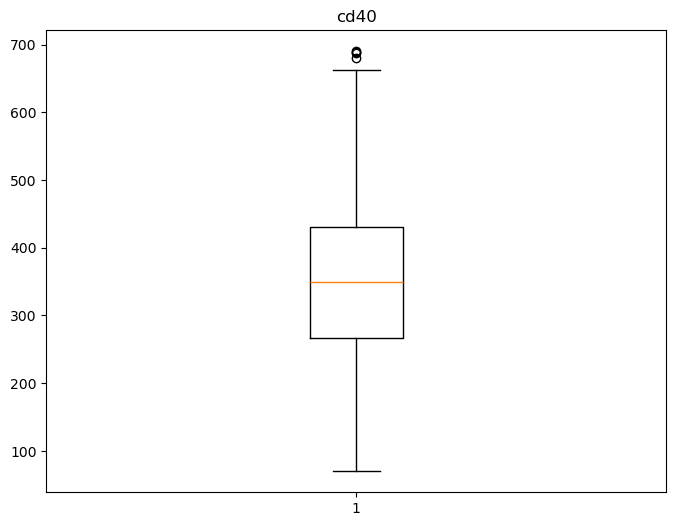

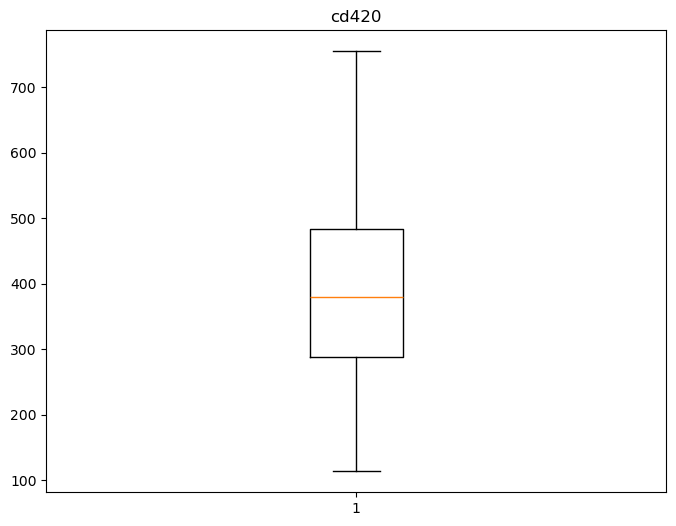

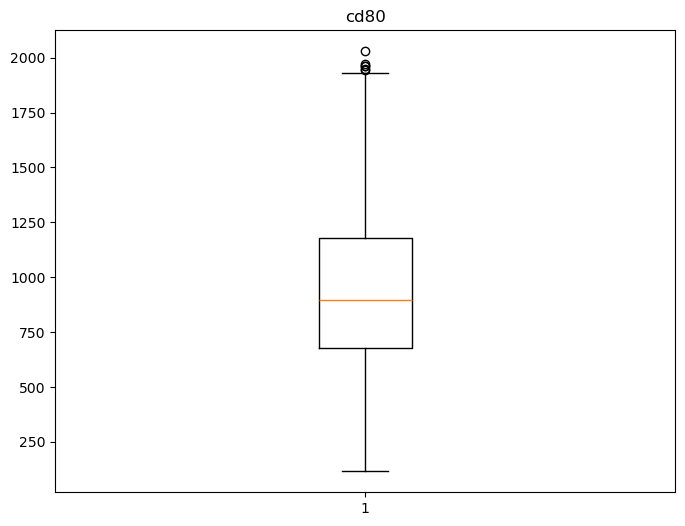

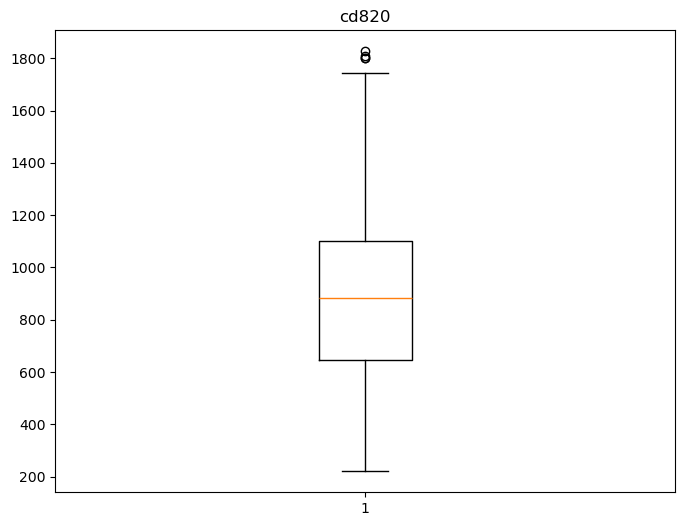

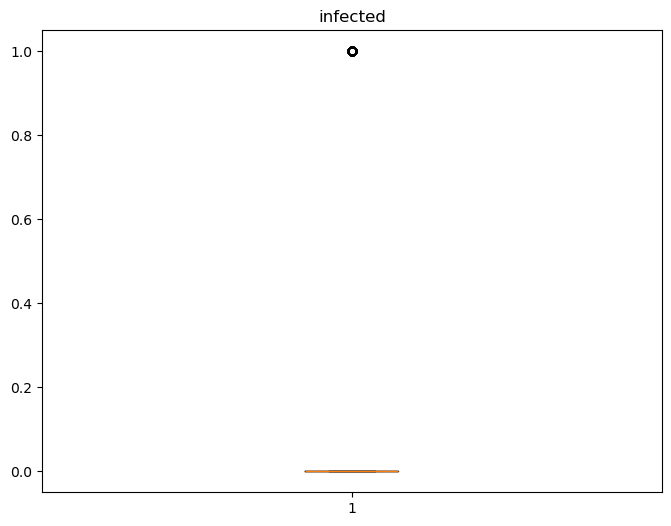

In [8]:
for col in df.columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[col])
    plt.title(f'{col}')
    plt.show()

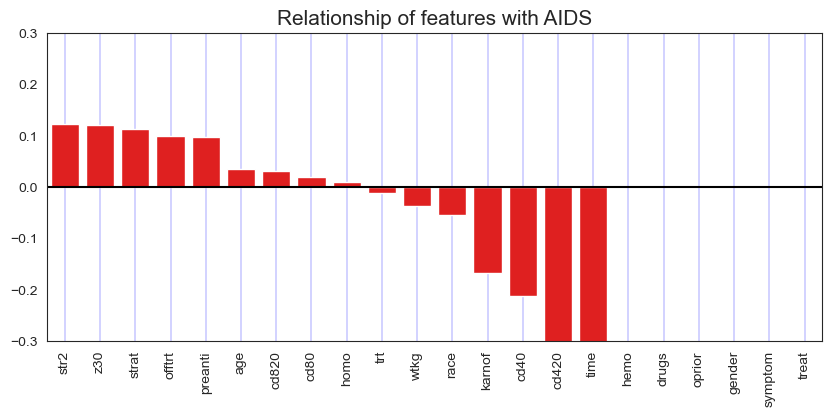

In [9]:
infect_corr = df.corr()["infected"].drop("infected", axis=0)
infect_corr = infect_corr.sort_values(ascending=False)
sns.set_style("white")
plt.figure(figsize=(10,4))
sns.barplot(y=infect_corr.values, x=infect_corr.index, color="red")
plt.axhline(0, color="k")
plt.xticks(rotation=90)
plt.grid(visible=True, axis="x", color="b", lw=0.25)
plt.ylim(-0.3, 0.3)
plt.title("Relationship of features with AIDS", fontsize=15)
plt.show()

In [27]:
infect_corr = df.corr()["infected"].drop("infected", axis=0)
infect_corr = infect_corr.sort_values(ascending=False)

In [28]:
df.nunique()


time        382
trt           3
age          37
wtkg        363
hemo          1
homo          2
drugs         1
karnof        3
oprior        1
z30           2
preanti     336
race          2
gender        1
str2          2
strat         3
symptom       1
treat         1
offtrt        2
cd40        328
cd420       366
cd80        532
cd820       500
infected      2
dtype: int64

In [29]:
df.shape

(724, 23)

In [34]:
df.infected.value_counts()

infected
0    599
1    125
Name: count, dtype: int64

infected
0    599
1    125
Name: count, dtype: int64


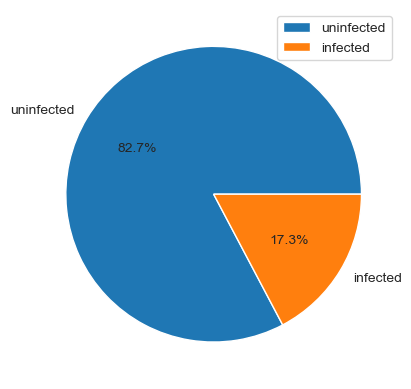

In [35]:
data=df['infected'].value_counts()
print(data)
plt.pie(data, labels=['uninfected','infected'], autopct="%1.1f%%" )

plt.legend()
plt.show()


In [10]:
X=df.drop(['infected'] , axis=1)
y = df['infected'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[112   5]
 [ 10  18]]
0.896551724137931
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       117
           1       0.78      0.64      0.71        28

    accuracy                           0.90       145
   macro avg       0.85      0.80      0.82       145
weighted avg       0.89      0.90      0.89       145



In [42]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [43]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [44]:
best_random_grid=rf_randomcv.best_estimator_

In [46]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {} \t".format(classification_report(y_test,y_pred)))

[[115   2]
 [ 11  17]]
Accuracy Score 0.9103448275862069
Classification report:               precision    recall  f1-score   support

           0       0.91      0.98      0.95       117
           1       0.89      0.61      0.72        28

    accuracy                           0.91       145
   macro avg       0.90      0.80      0.83       145
weighted avg       0.91      0.91      0.90       145
 	


In [11]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
smk = SMOTETomek( sampling_strategy=0.5,random_state=42)
X_res,y_res=smk.fit_resample(X,y)

In [12]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X_res,y_res,test_size=0.20,random_state=0)

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train1,y_train1)
prediction=rf_classifier.predict(X_test1)

In [63]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test1,prediction))
print(accuracy_score(y_test1,prediction))
print(classification_report(y_test1,prediction))

[[110   5]
 [  9  53]]
0.9209039548022598
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       115
           1       0.91      0.85      0.88        62

    accuracy                           0.92       177
   macro avg       0.92      0.91      0.91       177
weighted avg       0.92      0.92      0.92       177



In [64]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [65]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

rf_randomcv.fit(X_train1,y_train1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [66]:
best_random_grid=rf_randomcv.best_estimator_

In [67]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test1)
print(confusion_matrix(y_test1,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test1,y_pred)))
print("Classification report: {} \t".format(classification_report(y_test1,y_pred)))

[[111   4]
 [  8  54]]
Accuracy Score 0.9322033898305084
Classification report:               precision    recall  f1-score   support

           0       0.93      0.97      0.95       115
           1       0.93      0.87      0.90        62

    accuracy                           0.93       177
   macro avg       0.93      0.92      0.92       177
weighted avg       0.93      0.93      0.93       177
 	


In [13]:
import lazypredict 

from lazypredict.Supervised import LazyClassifier
import matplotlib.pyplot as plt



 

In [14]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_test,predictions_test = clf.fit(X_train1, X_test1, y_train1, y_test1)
print(models_test)

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [00:03<00:00,  9.09it/s]

[LightGBM] [Info] Number of positive: 229, number of negative: 476
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1594
[LightGBM] [Info] Number of data points in the train set: 705, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.324823 -> initscore=-0.731696
[LightGBM] [Info] Start training from score -0.731696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:03<00:00,  8.55it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LabelPropagation                   0.92               0.91     0.91      0.92   
LabelSpreading                     0.92               0.91     0.91      0.92   
ExtraTreesClassifier               0.94               0.91     0.91      0.94   
RandomForestClassifier             0.93               0.91     0.91      0.93   
XGBClassifier                      0.92               0.91     0.91      0.92   
NearestCentroid                    0.90               0.90     0.90      0.90   
LGBMClassifier                     0.92               0.90     0.90      0.91   
LinearDiscriminantAnalysis         0.93               0.90     0.90      0.92   
AdaBoostClassifier                 0.91               0.89     0.89      0.91   
GaussianNB                         0.91               0.89     0.89      0.91   
RidgeClassifierCV           

In [19]:
models_test.columns

Index(['Accuracy', 'Balanced Accuracy', 'ROC AUC', 'F1 Score', 'Time Taken'], dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'LabelPropagation'),
  Text(1, 0, 'LabelSpreading'),
  Text(2, 0, 'ExtraTreesClassifier'),
  Text(3, 0, 'RandomForestClassifier'),
  Text(4, 0, 'XGBClassifier'),
  Text(5, 0, 'NearestCentroid'),
  Text(6, 0, 'LGBMClassifier'),
  Text(7, 0, 'LinearDiscriminantAnalysis'),
  Text(8, 0, 'AdaBoostClassifier'),
  Text(9, 0, 'GaussianNB'),
  Text(10, 0, 'RidgeClassifierCV'),
  Text(11, 0, 'RidgeClassifier'),
  Text(12, 0, 'BaggingClassifier'),
  Text(13, 0, 'LinearSVC'),
  Text(14, 0, 'LogisticRegression'),
  Text(15, 0, 'CalibratedClassifierCV'),
  Text(16, 0, 'SVC'),
  Text(17, 0, 'NuSVC'),
  Text(18, 0, 'Perceptron'),
  Text(19, 0, 'DecisionTreeClassifier'),
  Text(20, 0, 'BernoulliNB'),
  Text(21, 0, 'SGDClassifier'),
  Text(22, 0, 'KNeighborsClassifier'),
  Text(23, 0, 'ExtraTreeClassifier'),
  Text(24, 0, 'PassiveAggressiveClassifier'),
  Text(25, 0,

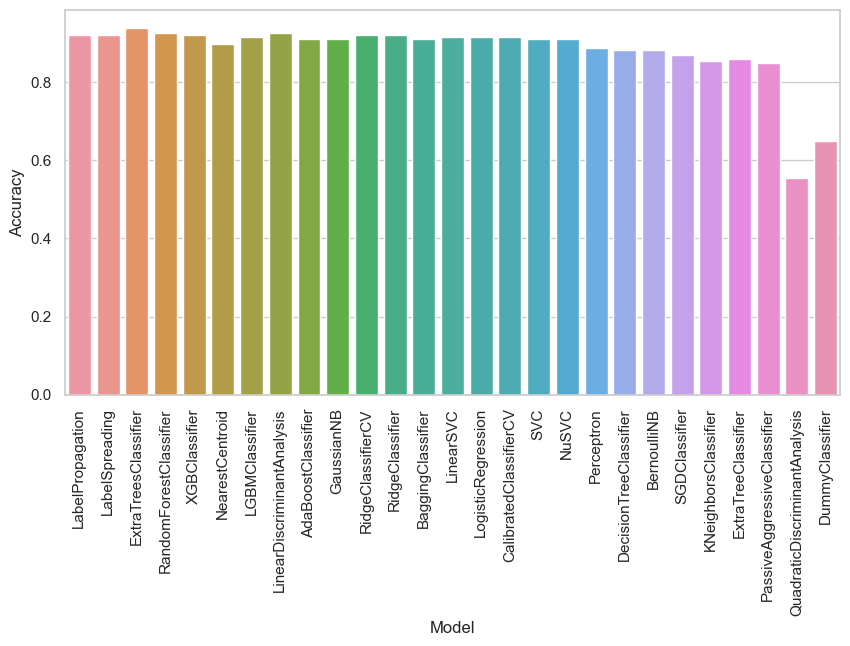

In [27]:
models=models_test.drop('Time Taken',axis=1)

plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=models.index, y="Accuracy", data=models)
plt.xticks(rotation=90)